# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Intentaremos responder las siguientes preguntas:

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?

2. ¿Cómo son los viajes típicamente en distancia y tiempo?

3. ¿Podremos segmentar los viajes de alguna manera? (clusterización)

## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020 y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [35]:
# Path del dataset a utilizar.
DATASET_PATH = "./data"

In [36]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-07.parquet


In [37]:
# Importamos las librerias necesarias para interactuar con el dataset.

#Pandas.
import pandas as pd

In [38]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
# El dataset evaluado corresponde al mes de Julio de 2020
df = pd.read_parquet( "./data/yellow_tripdata_2020-07.parquet")

# Para obtener una primer aproximación de cada columna, 
# podemos utilizar la funcion head, que nos mostrará las 5 primeras filas con sus respectivas columnas del dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-07-01 00:25:32,2020-07-01 00:33:39,1.0,1.50,1.0,N,238,75,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,0.0,None
1,1,2020-07-01 00:03:19,2020-07-01 00:25:43,1.0,9.50,1.0,N,138,216,1,26.5,0.5,0.5,0.00,0.0,0.3,27.80,0.0,None
2,2,2020-07-01 00:15:11,2020-07-01 00:29:24,1.0,5.85,1.0,N,230,88,2,18.5,0.5,0.5,0.00,0.0,0.3,22.30,2.5,None
3,2,2020-07-01 00:30:49,2020-07-01 00:38:26,1.0,1.90,1.0,N,88,232,1,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5,None
4,2,2020-07-01 00:31:26,2020-07-01 00:38:02,1.0,1.25,1.0,N,37,17,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,0.0,None


In [39]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800412 entries, 0 to 800411
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               800412 non-null  int64         
 1   tpep_pickup_datetime   800412 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  800412 non-null  datetime64[ns]
 3   passenger_count        737565 non-null  float64       
 4   trip_distance          800412 non-null  float64       
 5   RatecodeID             737565 non-null  float64       
 6   store_and_fwd_flag     737565 non-null  object        
 7   PULocationID           800412 non-null  int64         
 8   DOLocationID           800412 non-null  int64         
 9   payment_type           800412 non-null  int64         
 10  fare_amount            800412 non-null  float64       
 11  extra                  800412 non-null  float64       
 12  mta_tax                800412 non-null  floa

### Descripción de Columnas del Dataset.

- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1: Creative Mobile Technologies, LLC
    - 2: VeriFone Inc.
--- 

- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32

---

- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39

---
- **Passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

---
- **Trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50

---
- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238

---
- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75
---
- **RateCodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride
---
- **Store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.
---
- **Payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
---
- **Fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0
---
- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5
---
- **MTA_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5
---
- **Improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3

---
- **Tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  
---
- **Tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00
---
- **Total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30
---
- **Congestion_Surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00
---
- **Airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [40]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.

df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,800412.000000,737565.000000,800412.000000,737565.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,800412.000000,737565.000000
mean,1.645142,1.378401,4.304165,1.046801,160.061218,156.104931,1.246323,13.438400,1.003705,0.492124,1.789151,0.316874,0.296943,18.631460,2.145680
std,0.478961,1.039790,473.708961,1.203844,68.563400,72.990234,0.620122,13.675661,1.240157,0.078519,2.643472,1.533511,0.041673,15.060771,0.898707
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-391.500000,-4.500000,-0.500000,-25.830000,-18.360000,-0.300000,-397.600000,-2.500000
25%,1.000000,1.000000,1.000000,1.000000,107.000000,90.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000
50%,2.000000,1.000000,1.790000,1.000000,161.000000,161.000000,1.000000,9.000000,0.500000,0.500000,1.660000,0.000000,0.300000,14.160000,2.500000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,233.000000,2.000000,15.000000,2.500000,0.500000,2.750000,0.000000,0.300000,20.550000,2.500000
max,6.000000,9.000000,256069.130000,99.000000,265.000000,265.000000,4.000000,1995.000000,90.060000,3.300000,1001.000000,126.120000,0.300000,1995.000000,2.500000


<AxesSubplot:xlabel='VendorID', ylabel='Count'>

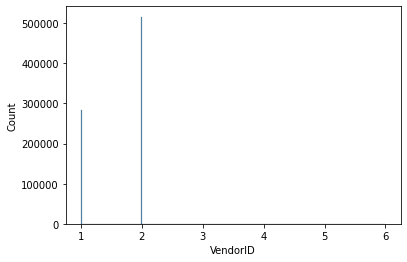

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.histplot(data=df['VendorID'], palette="Set1")

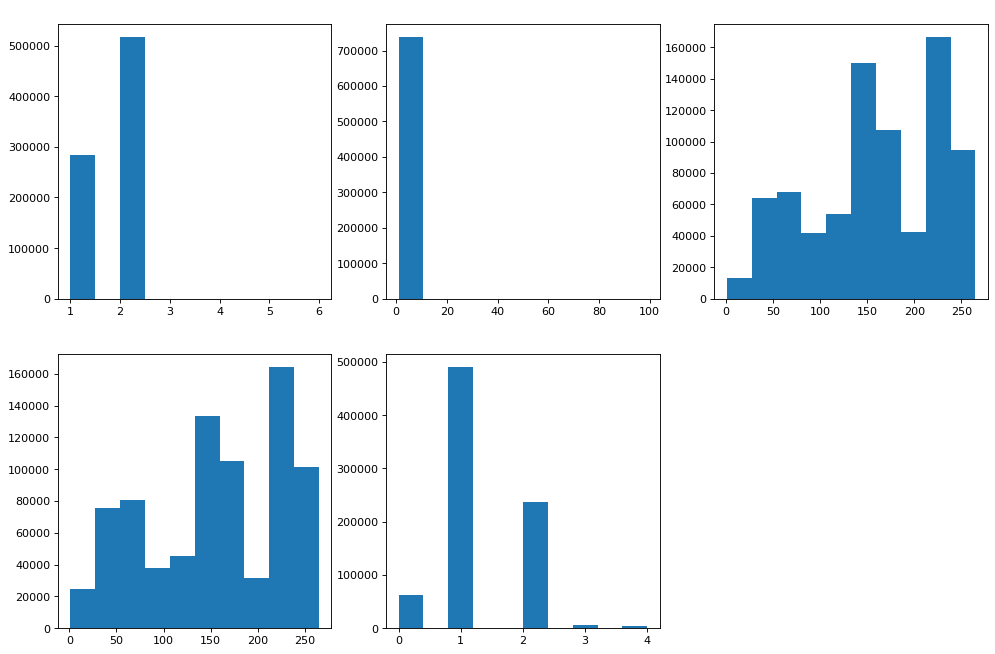

In [50]:
X_plot = df.filter(['VendorID', 'passengercount', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type'])
total_attrs = len(X_plot.columns)

plt.figure(figsize=(15,10), dpi=80)
for i in range(total_attrs):
  plt.subplot(int(total_attrs / 3 + 1), 3, i+1) # subplot starts from 1 (not 0)

  plt.hist(X_plot.iloc[:, i])
  plt.title(f'{i + 1}-Distribución de {X_plot.columns[i]}', color='w')
plt.show()